In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
folder = '/group/teaching/asr/labs/individual_recordings/s1645821'
folder = '/group/teaching/asr/labs/recordings'
wavs_txt = [os.path.join(folder,x) for x in os.listdir(folder)]
wavs = [wav for wav in wavs_txt if ('.wav' in wav)]
txts = [wav for wav in wavs_txt if ('.txt' in wav)]
# wavs

# Counting

In [136]:
def get_occurences(transcript_files):
    # count how many words are at the start
    dict_first = {}   # dictionary of first words
    dict_last  = {}   # dictionary of last words
    dict_all   = {}   # dictionary of all words
    txt_all    = []   # list of all sentences
    for txt in txts[:]:
        txt_file = open(txt, "r")       # open file
        txt_str = txt_file.read()       # string from file
        txt_list = txt_str.split()      # separate @ white space
        txt_first = txt_list[0]     # first word
        txt_last  = txt_list[-1]    # last word
        # -- add to dictionary & lists
        txt_all.append(txt_str)           # add to list of strings
        if txt_first in dict_first:       # add first words
            dict_first[txt_first] += 1
        else:
            dict_first[txt_first] = 1

        if txt_last in dict_last:         # add last words
            dict_last[txt_last] += 1
        else:
            dict_last[txt_last] = 1

        for word in txt_list:             # add all words
            if word in dict_all:
                dict_all[word] += 1
            else:
                dict_all[word] = 1
    return (dict_first, dict_last, dict_all)

# Pringing

In [7]:
# PRINTING
print('-'*10 + ' FIRST '+'-'*10)
for i,word in enumerate(sorted (dict_first)):
    print('{}) {}: {}'.format(i, word, dict_first[word]))
print()
print('-'*10 + ' LAST '+'-'*10)
for i,word in enumerate(sorted(dict_last)):
    print('{}) {}: {}'.format(i, word, dict_last[word]))
print()
print('-'*10 + ' ALL '+'-'*10)
for i,word in enumerate(sorted (dict_all)):
    print('{}) {}: {}'.format(i, word, dict_all[word]))

---------- FIRST ----------
0) a: 23
1) of: 5
2) peck: 7
3) peppers: 4
4) peter: 108
5) picked: 10
6) pickled: 22
7) piper: 12
8) the: 20
9) where's: 69

---------- LAST ----------
0) a: 1
1) of: 2
2) peck: 28
3) peppers: 113
4) peter: 14
5) picked: 68
6) pickled: 10
7) piper: 41
8) the: 1
9) where's: 2

---------- ALL ----------
0) a: 135
1) of: 222
2) peck: 244
3) peppers: 282
4) peter: 255
5) picked: 234
6) pickled: 265
7) piper: 243
8) the: 135
9) where's: 124


# Occurances

## Counting

In [10]:
list_labels, list_first, list_last, list_all = [], [], [], []

for word in sorted (dict_first):
    list_first.append(dict_first[word])
for word in sorted(dict_last):
    list_last.append(dict_last[word])
for word in sorted (dict_all):
    list_all.append(dict_all[word])
    list_labels.append(word)
print(' list_labels: {}\n list_first: {}\n list_last: {}\n list_all: {}\n'\
      .format(list_labels, list_first, list_last, list_all))

 list_labels: ['a', 'of', 'peck', 'peppers', 'peter', 'picked', 'pickled', 'piper', 'the', "where's"]
 list_first: [23, 5, 7, 4, 108, 10, 22, 12, 20, 69]
 list_last: [1, 2, 28, 113, 14, 68, 10, 41, 1, 2]
 list_all: [135, 222, 244, 282, 255, 234, 265, 243, 135, 124]



## Plotting

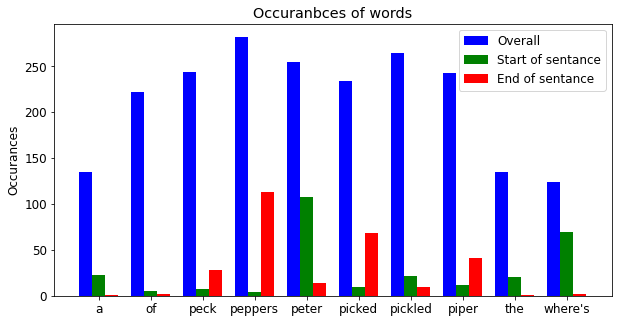

In [25]:
N = len(list_labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.25        # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

rects0 = ax.bar(ind-width, list_all,   width, color='blue')
rects1 = ax.bar(ind      , list_first, width, color='green')
rects2 = ax.bar(ind+width, list_last,  width, color='red')

# add some
ax.set_ylabel('Occurances')
ax.set_title('Occuranbces of words')
ax.set_xticks(ind)
ax.set_xticklabels( list_labels )

ax.legend( (rects0[0], rects1[0], rects2[0]), ('Overall', 'Start of sentance', 'End of sentance') )

plt.show()

# Bigrams

## Counting

In [127]:
bigrams = [b for l in txt_all[:] for b in zip(l.split()[:-1], l.split()[1:])]
bigram_dict = {}
for bigram in bigrams:
    if (bigram in bigram_dict):
        bigram_dict[bigram] += 1
    else:
        bigram_dict[bigram] = 1

### Array of occurances 


In [108]:
columns = list_labels
data = np.zeros([len(columns),len(columns)])
for (col, row),occurence in bigram_dict.items():
    col_idx = columns.index(col)
    row_idx = columns.index(row)
    data[col_idx,row_idx] = occurence
data

array([[  0.,   4., 105.,   0.,   5.,   4.,   6.,   9.,   0.,   1.],
       [  2.,   1.,   9.,  28.,   8.,   7., 153.,   6.,   4.,   2.],
       [  0., 177.,   6.,   5.,   5.,  10.,   7.,   2.,   2.,   2.],
       [  3.,   6.,   7.,   3.,  67.,  20.,  13.,  11.,   6.,  33.],
       [  4.,   9.,   5.,   8.,   6.,  25.,   7., 164.,   7.,   6.],
       [ 88.,   2.,   6.,  20.,  15.,   1.,  13.,   7.,   9.,   5.],
       [  6.,   7.,   7., 185.,  16.,   5.,  11.,  11.,   2.,   5.],
       [  0.,  11.,   8.,   8.,   9., 143.,  20.,   0.,   2.,   1.],
       [  1.,   0.,  82.,  14.,   3.,   5.,  12.,  17.,   0.,   0.],
       [  8.,   0.,   2.,   7.,  13.,   4.,   1.,   4.,  83.,   0.]])

### Array to dataframe

In [109]:
bigram_df = pd.DataFrame(data, columns,columns)
bigram_df = pd.concat(
    [pd.concat(
        [bigram_df],
        keys=['Word After'], axis=1)],
    keys=['Word Before'])
bigram_df

Word After                                             \
                             a     of   peck peppers peter picked pickled   
Word Before a              0.0    4.0  105.0     0.0   5.0    4.0     6.0   
            of             2.0    1.0    9.0    28.0   8.0    7.0   153.0   
            peck           0.0  177.0    6.0     5.0   5.0   10.0     7.0   
            peppers        3.0    6.0    7.0     3.0  67.0   20.0    13.0   
            peter          4.0    9.0    5.0     8.0   6.0   25.0     7.0   
            picked        88.0    2.0    6.0    20.0  15.0    1.0    13.0   
            pickled        6.0    7.0    7.0   185.0  16.0    5.0    11.0   
            piper          0.0   11.0    8.0     8.0   9.0  143.0    20.0   
            the            1.0    0.0   82.0    14.0   3.0    5.0    12.0   
            where's        8.0    0.0    2.0     7.0  13.0    4.0     1.0   

                                          
                     piper   the where's  
Word Before a          9.0   0.0     1.0  
            of         6.0   4.0     2.0  
            peck       2.0   2.0     2.0  
            peppers   11.0   6.0    33.0  
            peter    164.0   7.0     6.0  
            picked     7.0   9.0     5.0  
            pickled   11.0   2.0     5.0  
            piper      0.0   2.0     1.0  
            the       17.0   0.0     0.0  
            where's    4.0  83.0     0.0

## Plotting

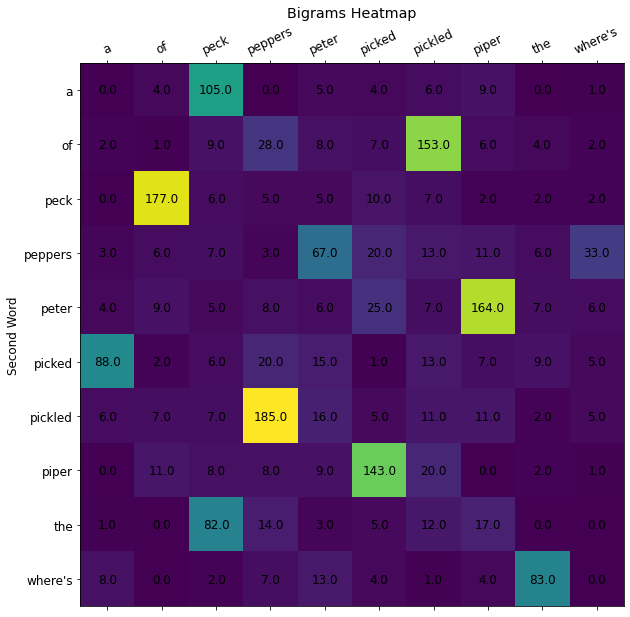

In [110]:
index = list_labels
columns = list_labels

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title('Bigrams Heatmap')
ax.set_ylabel('First Word')
ax.set_ylabel('Second Word')
# ax.pcolor(bigram_df)

ax.matshow(bigram_df)#, cmap='seismic')
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
plt.yticks(np.arange(0.0, len(bigram_df.index), 1), list_labels)
plt.xticks(np.arange(0.0, len(bigram_df.columns), 1), list_labels, rotation=25)
plt.show()

# Trigrams

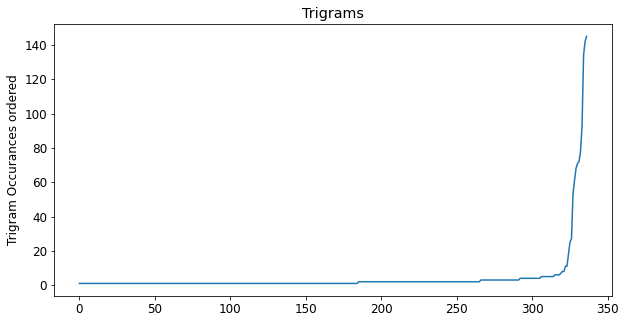

In [135]:
from nltk import trigrams

# -- making trigrams
list_trigrams = []
for sentance in txt_all:
    sentance_trigrams = list(trigrams(sentance.split()))
    for trigram in sentance_trigrams:
        list_trigrams.append(trigram)

# -- dictionary
dict_traigrams = {}
for trigram in list_trigrams:
    if (trigram in dict_traigrams):
        dict_traigrams[trigram] += 1
    else:
        dict_traigrams[trigram] = 1
# -- into lists
list_tri_ordered = []
list_occ_ordered = []
for tri, occ in (sorted(dict_traigrams.items(), key = lambda kv:(kv[1], kv[0]))):
#     print('{}: {}'.format(tri, occ))
    list_tri_ordered.append(tri)
    list_occ_ordered.append(occ)

# -- plotting
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
# add values
ax.plot(list(range(len(list_tri_ordered))), list_occ_ordered)
# add some
ax.set_ylabel('Trigram Occurances ordered')
ax.set_title('Trigrams')
# ax.set_xticks(ind)
# ax.set_xticklabels( list_labels )

plt.show()
    